## imports

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
df=pd.read_csv("train.csv")

In [7]:
def find_largest_classes(df): #return the name of the most commen targets
    df2=df.groupby("target").size()
    num_of_colms=list(df2.sort_values()[-2:].keys())
    return num_of_colms

#df3[df3.columns[0]]

In [8]:
def filter_classes(df): #return the data frame only with the common classes
    num_of_classes=find_largest_classes(df)
    print num_of_classes[0]
    df2=df[(df.target==num_of_classes[0]) | (df.target==num_of_classes[1])]
    return df2

In [9]:
#print filter_classes(df)

In [10]:
filtered_data = filter_classes(df)

Class_6


In [11]:
#filtered_data.describe(include = 'all')

## data visualization

In [12]:
data = filtered_data
grouped = data.groupby('target')
X,y = data[data.columns[:-1]],data[data.columns[-1]]

In [13]:
grouped.describe(include = 'all')

feat_12       feat_20       feat_21       feat_23  \
target                                                                  
Class_2 count  12059.000000  12059.000000  12059.000000  12059.000000   
        mean       0.091716      0.126710      0.169085      0.028609   
        std        0.337387      0.466171      0.569606      0.238716   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max        5.000000      9.000000      8.000000      6.000000   
Class_6 count  10660.000000  10660.000000  10660.000000  10660.000000   
        mean       0.171482      0.345497      0.461069      0.137711   
        std        0.540553      0.904406      1.074871      0.627559   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max       12.000000     13.000000     13.000000     15.000000   

                    feat_51       feat_56       feat_61       feat_69  \
target                                                                  
Class_2 count  12059.000000  12059.000000  12059.000000  12059.000000   
        mean       0.002239      0.118915      0.012190      0.056555   
        std        0.059675      0.933050      0.131089      0.363064   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      0.000000      0.000000   
        max        3.000000     42.000000      3.000000     17.000000   
Class_6 count  10660.000000  10660.000000  10660.000000  10660.000000   
        mean       0.122420      0.243152      0.956473      0.183583   
        std        0.848570      0.740943      1.884253      0.771583   
        min        0.000000      0.000000      0.000000      0.000000   
        25%        0.000000      0.000000      0.000000      0.000000   
        50%        0.000000      0.000000      0.000000      0.000000   
        75%        0.000000      0.000000      1.000000      0.000000   
        max       44.000000     20.000000     33.000000     21.000000   

                     feat_7       feat_70  
target                                     
Class_2 count  12059.000000  12059.000000  
        mean       0.020483      0.762584  
        std        0.177976      1.719298  
        min        0.000000      0.000000  
        25%        0.000000      0.000000  
        50%        0.000000      0.000000  
        75%        0.000000      1.000000  
        max        9.000000     32.000000  
Class_6 count  10660.000000  10660.000000  
        mean       0.114728      0.584240  
        std        0.448145      1.358014  
        min        0.000000      0.000000  
        25%        0.000000      0.000000  
        50%        0.000000      0.000000  
        75%        0.000000      1.000000  
        max        9.000000     25.000000

In [14]:
# TODO: refactor
def lables2floats(y):
    d = {'Class_2':0.0,'Class_6':1.0}
    return np.array([d[i] for i in y])

### scatter of features

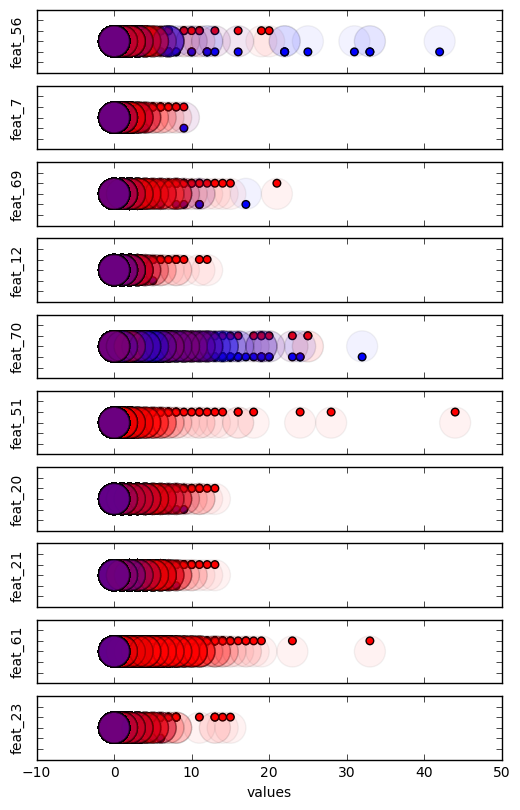

In [10]:
f, axarr = plt.subplots(10, sharex=True)
tmp = 0
#plt.title('features')
for feature in X:
    axarr[tmp].scatter(data[feature], lables2floats(y), c=lables2floats(y), s=30, cmap = "bwr")
    #plt.show()
    #axarr[i].title(feature)
    #axarr[i].xlabel('values')
    #plt.scatter(data[col].reshape(-1, 1),[0]*len(data[col].reshape(-1, 1)),s=500,c=data[data.columns[-1]].T,alpha=0.05)
    axarr[tmp].scatter(data[feature],[0.5]*len(data),c = lables2floats(y),s=500,alpha=0.05, cmap = "bwr")
    axarr[tmp].set_yticklabels([])
    axarr[tmp].set_ylabel(feature)
    tmp+=1
    
#axarr[10].scatter(x, y)
plt.xlabel('values')
plt.subplots_adjust(top = 2)
plt.show()
    #print(grouped[feature].agg([np.mean,np.std]))
    #x = np.linspace(data[feature].min(),data[feature].max(),num=100)
    #grouped[feature].plot(kind='density')
    #plt.show()
    #grouped[feature].plot.hist(alpha=0.5) #TODO: normalize - class size isn't equal   
    #plt.show()

In [11]:
import seaborn as sns
sns.set(style="white")
corr = X.corr()
corr_df = X.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
sns.despine(left=True, bottom=True)

ImportError: No module named seaborn

In [ ]:
import seaborn as sns
sns.set(style="white")
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, linewidths=5, cbar_kws={"shrink": 0.5})

## Explorer Dimensionally Reduction

### LDA

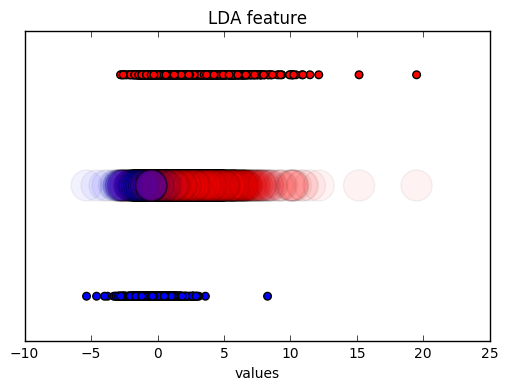

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=2)
LDA.fit(X, y)
reduced_data = LDA.transform(X)
plt.scatter(reduced_data[:, :], lables2floats(y), c=lables2floats(y), s=30, cmap = "bwr")


plt.title("LDA feature")
plt.xlabel('values')
plt.scatter(reduced_data,[0.5]*len(reduced_data),c = lables2floats(y),s=500,alpha=0.05, cmap = "bwr")
plt.yticks([])
plt.show()

### PCA

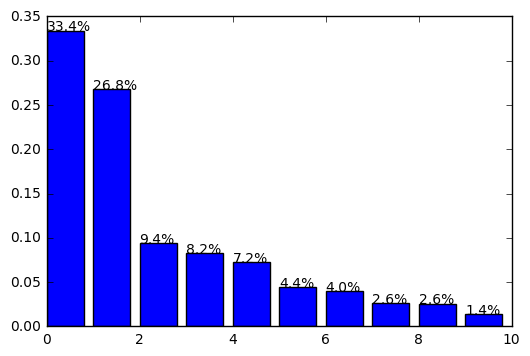

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)
plt.bar(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
for a,b in zip(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_):
    plt.text(a, b, str(np.round(b,3)*100)+"%")
plt.show()

In [17]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

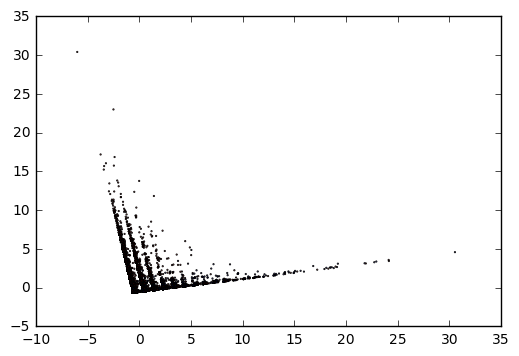

In [18]:
plt.scatter(X_r[:,0], X_r[:,1], s= 0.3, c=lables2floats(y), cmap = "bwr")
plt.show()

#### Pca after rotation

In [19]:
theta = np.radians(95)
c, s = np.cos(theta), np.sin(theta)
R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
X_r2 = np.array(X_r * R)

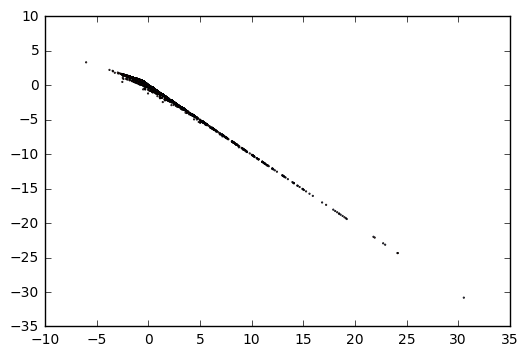

In [20]:
plt.scatter(X_r[:,0], X_r2[:,1], s= 0.3, c=lables2floats(y), cmap = "bwr")
plt.show()

# K-Nearest Neighbour

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# K-Nearest Neighbour with All combinations

In [41]:
from sklearn import neighbors, datasets

In [42]:
def knn(relevent_X): 
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    # creating odd list of K for KNN
    myList = list(range(1,50)) 
    # subsetting just the odd ones
    neighbors = filter(lambda x: x % 2 == 0, myList)

    # empty list that will hold cv scores
    cv_scores = []

    # we will use k-fold cross validation and will perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k) #calculate knn for k neighbors
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')#list of acores for each folder with the relevn
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    from sklearn import neighbors, datasets
    clf = neighbors.KNeighborsClassifier(n_neighbors=optimal_k, 
                                         weights="uniform",
                                        metric="euclidean",
                                        algorithm= "brute")
    clf.fit(relevent_X, y)
    return clf.score(relevent_X, y, sample_weight=None)

In [43]:
def Knn_with_plot_for_best_combination(relevent_X):
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    # creating odd list of K for KNN
    myList = list(range(1,50)) 
    # subsetting just the odd ones
    neighbors = filter(lambda x: x % 2 == 0, myList)

    # empty list that will hold cv scores
    cv_scores = []

    # we will use k-fold cross validation and will perform 10-fold cross validation
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k) #calculate knn for k neighbors
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')#list of acores for each folder with the relevn
        cv_scores.append(scores.mean())
    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]
    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]

 

    # plot misclassification error vs k
    
    plt.plot(neighbors, MSE)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    print "The optimal number of neighbors is %d" % optimal_k

In [44]:
LDA_PCA=np.concatenate((reduced_data, X_r), axis=1)
LDA_and_all_data=np.concatenate((reduced_data, X), axis=1)
PCA_and_all_data=np.concatenate((X_r, X), axis=1)
LDA_PCA_and_all_data=np.concatenate((PCA_and_all_data, reduced_data), axis=1)
print LDA_and_all_data.shape
print PCA_and_all_data.shape
print LDA_PCA_and_all_data.shape

(22719L, 11L)
(22719L, 12L)
(22719L, 13L)


In [45]:
combination_lst=[X,X_r,reduced_data,LDA_PCA,LDA_and_all_data,PCA_and_all_data,LDA_PCA_and_all_data]
combination_lst_names=['All data','Only Pca','Only LDA','LDA and PCA','LDA and all_data','PCA and all data','LDA, PCA and all data']

In [46]:
combination_lst=[X,X_r]
combination_lst_names=['All data','Only Pca']

In [47]:
def Best_combination(combination_lst): 
    max_score=0
    max_index=0
    n=len(combination_lst)
    scores_lst=[]
    for i in range (n):
        score_i=knn(combination_lst[i])
        scores_lst.append(score_i)
        if score_i>max_score:
            max_score=score_i
            max_index=i
    return max_index,scores_lst

In [48]:
max_index,scores_lst= Best_combination(combination_lst)
print scores_lst
print max_index

[0.74668779435714605, 0.73889695849289139]
0


In [49]:
for i in range(len(scores_lst)):
    print "The score for "+combination_lst_names[i]+" with optimal K is: "+str(scores_lst[i])
print "We get the meximun score when we use knn with data that include "+combination_lst_names[max_index] + ". The ocore that we get in that case is "+ str(scores_lst[max_index])

The score for All datawith optimal K is: 0.746687794357
The score for Only Pcawith optimal K is: 0.738896958493
We get the meximun score when we use knn with data that includeAll data. The Socore that we get in that case is 0.746687794357


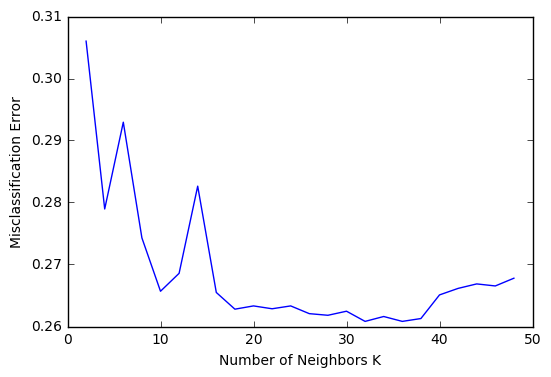

The optimal number of neighbors is 32


In [50]:
Knn_with_plot_for_best_combination(combination_lst[max_index])

## scores the missclassification error for pure KNeighborsClassifier

In [ ]:
neighbors = filter(lambda x: x % 2 == 0, myList)
from sklearn.metrics import accuracy_score
cv_scores_for_test = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    cv_scores_for_test.append(accuracy_score(y_test, knn.predict(X_test)))
    
MSE_test = [1 - x for x in cv_scores_for_test]

In [ ]:
# for [:2] features
# perform 10-fold cross validation
cv_scores_for_test_0_2 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,:3], y_train)
    cv_scores_for_test_0_2.append(accuracy_score(y_test, knn.predict(X_test[:,:3])))
    
MSE_test_0_2 = [1 - x for x in cv_scores_for_test_0_2]

In [ ]:
# for [2:4] features
# perform 10-fold cross validation
cv_scores_for_test_3_5 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,3:6], y_train)
    cv_scores_for_test_3_5.append(accuracy_score(y_test, knn.predict(X_test[:,3:6])))
    
MSE_test_3_5 = [1 - x for x in cv_scores_for_test_3_5]

In [ ]:
# for [2:4] features
# perform 10-fold cross validation
cv_scores_for_test_6_9 = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[:,6:], y_train)
    cv_scores_for_test_6_9.append(accuracy_score(y_test, knn.predict(X_test[:,6:])))
    
MSE_test_6_9 = [1 - x for x in cv_scores_for_test_6_9]

In [ ]:
# plot miscllassification error vs k
plt.clf()
plt.plot(neighbors, MSE, label='k-fold')
plt.plot(neighbors, MSE_test, label='whole dataset and features')
plt.plot(neighbors, MSE_test_0_2, label='features [:2]')
plt.plot(neighbors, MSE_test_3_5, label='features [3:5]')
plt.plot(neighbors, MSE_test_6_9, label='features [6:9]')
plt.xlabel('number of neighbors K')
plt.ylabel('misclassification error')
plt.legend()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
##add here the relvent graph

In [ ]:
def Naive_relevent_data(relevent_X): 
    #X_without_correlated = X.drop(relevent_X.corr().abs().sum().argxmax(), 1)
    X_train, X_test, y_train, y_test = train_test_split(relevent_X, y, test_size=0.33, random_state=42)
    clf = GaussianNB()
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')#list of scores for each folder with the relevn

    # changing to misclassification error
    MSE = [1 - x for x in scores]
    return np.mean(MSE)

In [ ]:
def Best_combination_Naive(combination_lst): 
    max_score=0
    max_index=0
    n=len(combination_lst)
    for i in range (n):
        score_i=Naive_relevent_data(combination_lst[i])
        if score_i>max_score:
            max_score=score_i
            max_index=i
    return combination_lst_names[max_index],(1-max_score)*100

In [ ]:
print Best_combination_Naive(combination_lst)

### Neural network

In [ ]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [ ]:
clf = MLPClassifier(#-----The architecture:------#
                    activation="tanh", #What is the activation function between neurons {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}?
                    hidden_layer_sizes= (50,100,20),  #What is the architecture? what happens if we add more layers?
                    alpha = 0.0001, #The regularization: loss + alpha*W^2
                    batch_size = "auto",#when set to auto,batch zise= min(200,n_samples)
                    #-----The optimizer:------#
                    solver = "sgd", #Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                    learning_rate = "adaptive", #How does the learning rate update itself? {‘constant’, ‘invscaling’, ‘adaptive’}
                    learning_rate_init = 0.5, #What is the initial learning rate? in some optimizers the learning rate changes.
                    power_t = 0.5, #When we choose learning rate to be invscaling, it means that we multiply this number each epoch.
                    momentum = 0.9, #Whats the fraction of the updated dedicated to the momentum? the "friction".
                    nesterovs_momentum = False, #Out of the scope of the course, leave false.
                    early_stopping = False, #Do we set a validation data aside?
                    tol = 1e-4, #A broad concept of converges, when we can say the algorithm converged?
                    warm_start = True, #if we fit at the second time, do we start from the last fit?
                    max_iter = 15)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
print clf.score(X_test, y_test)

In [ ]:
score_train = []
score_test = []
for i in range(50):
    clf.fit(X_train, y_train)
    score_test.append(clf.score(X_test, y_test))
    score_train.append(clf.score(X_train, y_train))
        
        
print "DONE!"

plt.plot(score_train)
plt.plot(score_test)
plt.show()

### Foreast Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier # It is called ENSEMBLE method since we are using more than one classifier.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, lables2floats(y),test_size=0.33,random_state=42)

In [ ]:
bdt = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(min_samples_split=5,max_depth=5), n_estimators=1000,algorithm = "SAMME") # 
#bdt = AdaBoostClassifier(base_estimator= GaussianNB(), n_estimators=2000,algorithm = "SAMME")
bdt.fit(X_train, y_train)

In [ ]:
bdt.estimators_[0] #<Example of one of the 200 estimators, this estimator is already fitted and can be plotted/

In [ ]:
weights = bdt.estimator_weights_ #<---- the weights of each DT classifier

print "The weights of each estimator"
plt.plot(weights/np.sum(weights))
plt.show()

In [ ]:
def plot_decision_bounderies(stage,X_r):

    plot_step = 0.1
    
    plt.figure(figsize=(10, 10))
    
    x_min, x_max = X_r[:, 0].min() - 1, X_r[:, 0].max() + 1
    y_min, y_max = X_r[:, 1].min() - 1, X_r[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    # If we don't give a stage parameter, the computer will plot the decision boundaries of the ensemble.
    if stage==None:
        Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])


    #Given a specific stage, the decision boundaries that will be shown are the boundaries of the estimatior No. stage.
    else:
        Z= bdt.estimators_[stage].predict(np.c_[xx.ravel(), yy.ravel()])
        
    Z =Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z,cmap="seismic") #Plotting the decision boundaries of the base estimator at stage i/the boosted, 

    plt.scatter(X_r[:,0], X_r[:,1], c=lables2floats(y),s=1.6, cmap = "bwr")
    
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.title('Decision Boundary')
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35)
    plt.show()

In [ ]:
plot_decision_bounderies(None,X_r)

In [ ]:
plot_decision_bounderies(None,X_r2)

In [ ]:
print bdt.score(X_test, y_test)